### Script contents:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Elbow technique
#### 4. k-means clustering

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# prompt matplotlib visuals to appear in notebook 
%matplotlib inline

In [3]:
# Define path
path = r'C:\Users\Jay\Documents\UFO Sightings Analysis'

In [4]:
# Import most recent data set
df = pd.read_csv(os.path.join(path, '02 Data Sets', 'Prepared Data', 'ufo_sighting_data_regressed.csv'))

In [5]:
df.shape

(79997, 12)

In [6]:
df.head()

,Unnamed: 0,Date_time,city,state/province,country,UFO_shape,length_seconds,duration_description,description,date_documented,latitude,longitude
0,0,5/8/2014 18:45,inverloch,none,Australia,light,300,5 minutes,Bright orange light travelling above inverloch...,5/8/2014,-38.627,145.723
1,1,10/7/2013 20:00,oklahoma,OK,United States,circle,10526400,4 months,Bright flying orb.,10/14/2013,35.468,-97.516
2,2,8/3/2008 21:00,virginia beach,VA,United States,fireball,10526400,4 months,this object was very high up and emmited no so...,8/12/2008,36.853,-75.978
3,3,3/1/1994 1:00,menifee,CA,United States,unknown,10526400,4 months,Sun City / Menifee UFO sightings in 1994,2/22/2005,33.728,-117.146
4,4,1/1/1977 2:30,new canaan,CT,United States,unknown,9468000,2-3 years,possible abductions when I was a kid living in...,11/19/1998,41.147,-73.495


### 2. Data cleaning

In [7]:
df.columns

Index(['Unnamed: 0', 'Date_time', 'city', 'state/province', 'country',
       'UFO_shape', 'length_seconds', 'duration_description', 'description',
       'date_documented', 'latitude', 'longitude'],
      dtype='object')

In [8]:
# Remove ambiguous number column as in Exercise 6.3
del df['Unnamed: 0']

In [9]:
df.shape

(79997, 11)

In [11]:
# Check the mean, median, min & max
df['length_seconds'].mean()

3697.921809567859

In [12]:
df['length_seconds'].median()

180.0

In [13]:
df['length_seconds'].min()

0

In [14]:
df['length_seconds'].max()

10526400

In [24]:
# Clean extreme high & low values from "length_seconds" variable
df_1 = df[df['length_seconds'] <=2000000] 

In [25]:
df_2 = df_1[df['length_seconds'] >2] 

C:\Users\Jay\AppData\Local\Temp/ipykernel_14500/2760853067.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2 = df_1[df['length_seconds'] >2]


In [26]:
df_2['length_seconds'].min()

3

In [27]:
df_2['length_seconds'].max()

1814400

In [29]:
df_2['length_seconds'].mean()

1656.7950424395253

In [30]:
df_2['length_seconds'].median()

180.0

In [31]:
df_2.shape

(76933, 11)

In [32]:
# Create data frame with only numerical variables, for use with k-means algorithm
df_k = df_2[['length_seconds', 'latitude', 'longitude']]
df_k.head()

,length_seconds,latitude,longitude
0,300,-38.627,145.723
11,40,53.317,-3.100
19,240,43.225,-79.980
30,1814400,40.637,-74.910
31,1814400,41.486,-73.051


### 3. Elbow technique

In [33]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [35]:
score = [kmeans[i].fit(df_k).score(df_k) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-41594492388733.234,
 -14136397800163.258,
 -4742882902371.685,
 -2921136619905.106,
 -1734548927021.827,
 -996197081420.4984,
 -669274951208.6703,
 -417231212767.9581,
 -303792517295.31946]

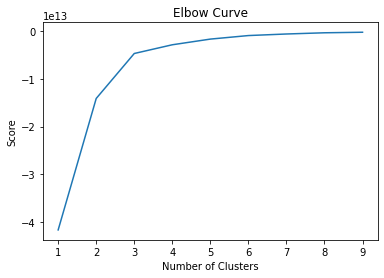

In [36]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### Appearing identical to the example notebook, we see a jump from 2 to 3 on the x-axis, then the curve straightens out. This indicates the optimal count for clusters is three.

### 4. k-means clustering

In [37]:
# Create the k-means object
kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [39]:
# Fit the k-means object to the data
kmeans.fit(df_k)

C:\Users\Jay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [41]:
df_k['clusters'] = kmeans.fit_predict(df_k)

C:\Users\Jay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Jay\AppData\Local\Temp/ipykernel_14500/1531503818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_k['clusters'] = kmeans.fit_predict(df_k)


In [42]:
df_k.head()

,length_seconds,latitude,longitude,clusters
0,300,-38.627,145.723,0
11,40,53.317,-3.100,0
19,240,43.225,-79.980,0
30,1814400,40.637,-74.910,1
31,1814400,41.486,-73.051,1


In [43]:
df_k['clusters'].value_counts()

0    76816
2      104
1       13
Name: clusters, dtype: int64

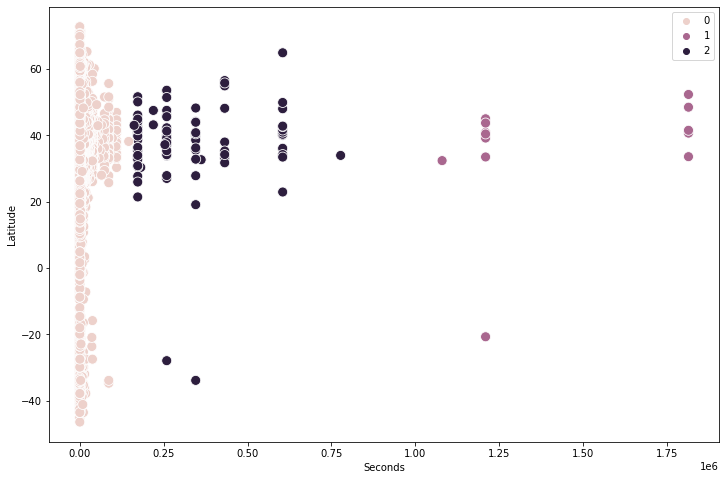

In [44]:
# Plot the clusters for the "length_seconds" and "latitude" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['length_seconds'], y=df_k['latitude'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Seconds') # Label x-axis.
plt.ylabel('Latitude') # Label y-axis.
plt.show()

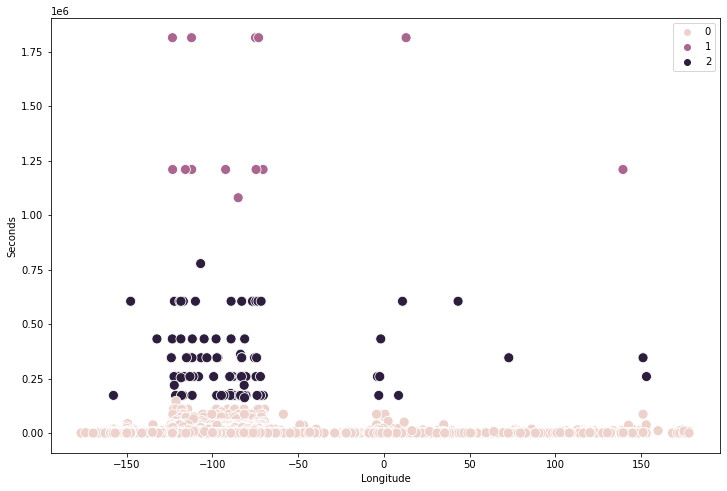

In [45]:
# Plot the clusters for the "longitude" and "length_seconds" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['longitude'], y=df_k['length_seconds'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Longitude') 
plt.ylabel('Seconds') 
plt.show()

##### Thoughts: These cluster plots make sense visually, considering the large majority of observations appear in the "0" (pink) cluster. In order to gain better insights, this cluster should be broken down into smaller sub-groups, and plotted with axis tick mark multipliers around x100, or possibly as low as x10.

In [47]:
df_k.loc[df_k['clusters'] == 2, 'cluster'] = 'dark purple'
df_k.loc[df_k['clusters'] == 1, 'cluster'] = 'purple'
df_k.loc[df_k['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\Jay\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\Jay\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


#### Descriptive statistics:

In [48]:
df_k.groupby('cluster').agg({'length_seconds':['mean', 'median'], 
                             'latitude':['mean', 'median'], 
                            'longitude':['mean', 'median']})

length_seconds              latitude           longitude         
                      mean     median       mean   median       mean   median
cluster                                                                      
dark purple   3.150115e+05   259200.0  37.796788  39.5985 -85.184231 -91.5975
pink          9.904423e+02      180.0  38.143067  39.4140 -86.874376 -87.8940
purple        1.432246e+06  1209600.0  36.188769  40.6370 -69.560462 -84.9690

##### Proposed uses: Considering the median value for length_seconds has remained a constant of 180 (3 minutes) even prior to removing outliers, this is clearly the most common reported duration. This is also displayed in the tight linear clusters of pink data points above. It will likely provide additional insight to visually plot only these observations seperately. 
##### Similarly for latitude and longitude, the median values should consistently indicate the area(s) where the most sightings have been reported, while the mean values may have been affected by remaining outliers.

In [49]:
# export current dataframe to Prepared Data
df_2.to_csv(os.path.join(path, '02 Data Sets', 'Prepared Data', 'ufo_sighting_data_clustered.csv')) 